<a href="https://colab.research.google.com/github/kaho-cell/kaggle/blob/main/kaggle_air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#必要なライブラリをインポート
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
plt.style.use("ggplot")

In [87]:
import pandas as pd
import numpy as np

In [88]:
#ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

In [89]:
#データの読み込み
train_df = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/sample_submission.csv")

In [90]:
#データの確認
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [91]:
test_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [92]:
submission.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0


In [93]:
#欠損値の確認
train_df.isnull().sum()

,0
date_time,0
deg_C,0
relative_humidity,0
absolute_humidity,0
sensor_1,0
sensor_2,0
sensor_3,0
sensor_4,0
sensor_5,0
target_carbon_monoxide,0


In [94]:
test_df.isnull().sum()

,0
date_time,0
deg_C,0
relative_humidity,0
absolute_humidity,0
sensor_1,0
sensor_2,0
sensor_3,0
sensor_4,0
sensor_5,0


In [95]:
submission.isnull().sum()

,0
date_time,0
target_carbon_monoxide,0
target_benzene,0
target_nitrogen_oxides,0


In [96]:
#テストデータと学習データを結合
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)

In [97]:
#変数date_timeをyear, month, day, hourに分割
date_parts = all_df["date_time"].str.split(" ", expand=True)
ymd_parts = date_parts[0].str.split("-", expand=True)

all_df["year"] = ymd_parts[0].astype(int)
all_df["month"] = ymd_parts[1].astype(int)
all_df["day"] = ymd_parts[2].astype(int)
all_df["time"] = date_parts[1]

all_df["hour"] = all_df["time"].str.split(":").str[0].astype(int)
all_df = all_df.drop(["date_time", "time"], axis=1)

In [98]:
all_df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,year,month,day,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010,3,10,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010,3,10,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010,3,10,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010,3,10,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010,3,10,22


In [99]:
############################################################
#target_carbon_monoxideの予測
############################################################

In [100]:
all_df_le = all_df.drop(["target_benzene", "target_nitrogen_oxides"], axis=1)

In [101]:
#再び学習データとテストデータに分割する
train_df_le = all_df_le[~(all_df_le["target_carbon_monoxide"].isnull())]
test_df_le = all_df_le[all_df_le["target_carbon_monoxide"].isnull()]

In [102]:
train_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,year,month,day,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,2010,3,10,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,2010,3,10,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,2010,3,10,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,2010,3,10,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,2010,3,10,22


In [103]:
test_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,year,month,day,hour
7111,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,NaN,2011,1,1,0
7112,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,NaN,2011,1,1,1
7113,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,NaN,2011,1,1,2
7114,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,NaN,2011,1,1,3
7115,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,NaN,2011,1,1,4


In [104]:
#LightGBMを使用してデータを予測
import lightgbm as lgb

In [105]:
#クロスバリエーションを用いてモデルの学習を行う
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

#LightGBMのハイパーパラメータを設定
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    "verbose": -1
}

#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_carbon_monoxide"], axis = 1) #説明変数
train_Y = train_df_le["target_carbon_monoxide"] #目的変数

In [106]:
#平均二乗誤差を出すライブラリをインポート
from sklearn.metrics import mean_squared_error

In [107]:
import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
reses_mean

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.35128
[20]	valid_0's l2: 0.168284
[30]	valid_0's l2: 0.141752
[40]	valid_0's l2: 0.142023
[50]	valid_0's l2: 0.14397
Early stopping, best iteration is:
[32]	valid_0's l2: 0.140111
y_valid 0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
2366    4.6
2367    3.9
2368    1.8
2369    1.7
2370    1.8
Name: target_carbon_monoxide, Length: 2371, dtype: float64
y_pred [3.0625956  2.18167067 2.16959322 ... 1.69434023 1.8025937  1.74852456]
0.25011139519291425
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.398561
[20]	valid_0's l2: 0.241025
[30]	valid_0's l2: 0.213789
[40]	valid_0's l2: 0.199729
[50]	valid_0's l2: 0.202298
[60]	valid_0's l2: 0.201484
Early stopping, best iteration is:
[41]	valid_0's l2: 0.199152
y_valid 2371    1.7
2372    1.6
2373    1.9
2374    1.6
2375    2.6
       ... 
4736    0.7
4737    0.4
4738    0.4
4739    0.5
4740    1.2
Name: ta

np.float64(0.2732985412892462)

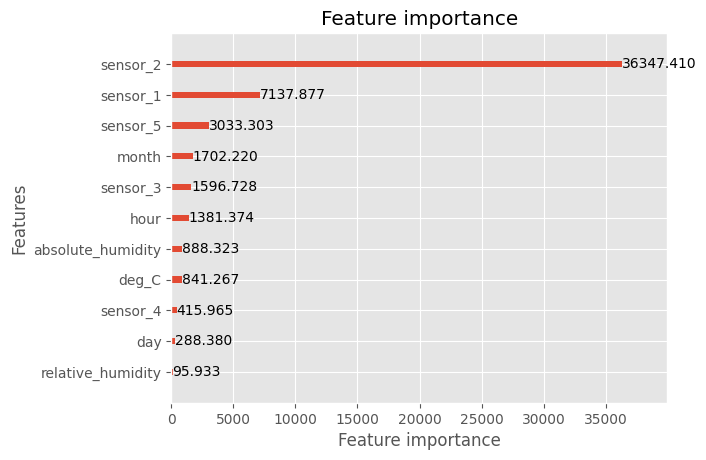

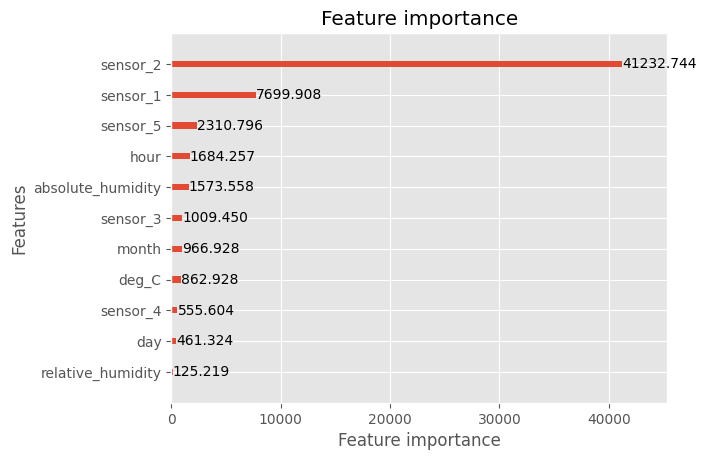

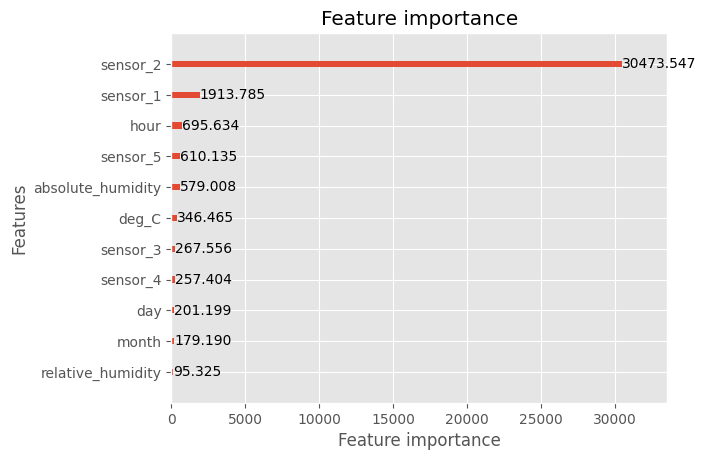

In [108]:
#各変数の重要度を確認する
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)
plt.show()
#max_num_featuresで表示する数を15個制限

In [109]:
#説明変数をsensor_2のみで再予測
train_X = train_df_le[["sensor_2"]] #説明変数
train_Y = train_df_le["target_carbon_monoxide"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.391913
[20]	valid_0's l2: 0.242967
[30]	valid_0's l2: 0.230081
[40]	valid_0's l2: 0.230979
[50]	valid_0's l2: 0.232377
Early stopping, best iteration is:
[32]	valid_0's l2: 0.230041
y_valid 0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
2366    4.6
2367    3.9
2368    1.8
2369    1.7
2370    1.8
Name: target_carbon_monoxide, Length: 2371, dtype: float64
y_pred [2.45803669 1.64308821 1.67858588 ... 1.6795571  1.88577499 2.18897617]
0.3045247351864578
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.41951
[20]	valid_0's l2: 0.314126
[30]	valid_0's l2: 0.310069
[40]	valid_0's l2: 0.31284
Early stopping, best iteration is:
[26]	valid_0's l2: 0.309502
y_valid 2371    1.7
2372    1.6
2373    1.9
2374    1.6
2375    2.6
       ... 
4736    0.7
4737    0.4
4738    0.4
4739    0.5
4740    1.2
Name: target_carbon_monoxide, Length: 2370, dtype: float64
y_pred

In [110]:
#説明変数をsensor_1とsensor_2で再予測
train_X = train_df_le[["sensor_2", "sensor_1"]] #説明変数
train_Y = train_df_le["target_carbon_monoxide"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.337153
[20]	valid_0's l2: 0.206134
[30]	valid_0's l2: 0.203492
[40]	valid_0's l2: 0.213765
Early stopping, best iteration is:
[24]	valid_0's l2: 0.200663
y_valid 0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
2366    4.6
2367    3.9
2368    1.8
2369    1.7
2370    1.8
Name: target_carbon_monoxide, Length: 2371, dtype: float64
y_pred [3.42692257 2.12980476 2.28053134 ... 1.65948593 1.9408758  1.95238336]
0.315105779717064
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.434604
[20]	valid_0's l2: 0.315005
[30]	valid_0's l2: 0.30099
[40]	valid_0's l2: 0.305902
Early stopping, best iteration is:
[29]	valid_0's l2: 0.299624
y_valid 2371    1.7
2372    1.6
2373    1.9
2374    1.6
2375    2.6
       ... 
4736    0.7
4737    0.4
4738    0.4
4739    0.5
4740    1.2
Name: target_carbon_monoxide, Length: 2370, dtype: float64
y_pred [1.71206229 1.94619545 2.07

In [111]:
#すべての説明変数を使ったやり方が一番精度が良いのでその方法で再度予測を行う

#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_carbon_monoxide"], axis = 1) #説明変数
train_Y = train_df_le["target_carbon_monoxide"] #目的変数
import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
reses_mean

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.35128
[20]	valid_0's l2: 0.168284
[30]	valid_0's l2: 0.141752
[40]	valid_0's l2: 0.142023
[50]	valid_0's l2: 0.14397
Early stopping, best iteration is:
[32]	valid_0's l2: 0.140111
y_valid 0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
2366    4.6
2367    3.9
2368    1.8
2369    1.7
2370    1.8
Name: target_carbon_monoxide, Length: 2371, dtype: float64
y_pred [3.0625956  2.18167067 2.16959322 ... 1.69434023 1.8025937  1.74852456]
0.25011139519291425
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.398561
[20]	valid_0's l2: 0.241025
[30]	valid_0's l2: 0.213789
[40]	valid_0's l2: 0.199729
[50]	valid_0's l2: 0.202298
[60]	valid_0's l2: 0.201484
Early stopping, best iteration is:
[41]	valid_0's l2: 0.199152
y_valid 2371    1.7
2372    1.6
2373    1.9
2374    1.6
2375    2.6
       ... 
4736    0.7
4737    0.4
4738    0.4
4739    0.5
4740    1.2
Name: ta

np.float64(0.2732985412892462)

In [112]:
#テストデータの予測
#テストデータの用意
test_X = test_df_le.drop(["target_carbon_monoxide"], axis = 1)

In [113]:
#クロスバリエーションごとに各モデルで予測値を算出
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [114]:
#predsの平均を計算してpreds_meanとして取得
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [115]:
#予測値をtarget_carbon_monoxideの値として置き換え
submission["target_carbon_monoxide"] = preds_mean

In [116]:
############################################################
#target_benzeneの予測
############################################################

In [117]:
all_df_le = all_df.drop(["target_carbon_monoxide", "target_nitrogen_oxides"], axis=1)

In [118]:
#再び学習データとテストデータに分割する
train_df_le = all_df_le[~(all_df_le["target_benzene"].isnull())]
test_df_le = all_df_le[all_df_le["target_benzene"].isnull()]

In [119]:
train_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_benzene,year,month,day,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,12.0,2010,3,10,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,9.9,2010,3,10,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,9.2,2010,3,10,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,9.7,2010,3,10,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,6.4,2010,3,10,22


In [120]:
test_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_benzene,year,month,day,hour
7111,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,NaN,2011,1,1,0
7112,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,NaN,2011,1,1,1
7113,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,NaN,2011,1,1,2
7114,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,NaN,2011,1,1,3
7115,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,NaN,2011,1,1,4


In [121]:
#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_benzene"], axis = 1) #説明変数
train_Y = train_df_le["target_benzene"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 7.56834
[20]	valid_0's l2: 2.11542
[30]	valid_0's l2: 1.59777
[40]	valid_0's l2: 1.60808
[50]	valid_0's l2: 1.66333
Early stopping, best iteration is:
[33]	valid_0's l2: 1.58945
y_valid 0       12.0
1        9.9
2        9.2
3        9.7
4        6.4
        ... 
2366    25.8
2367    23.2
2368    10.0
2369     8.6
2370     9.8
Name: target_benzene, Length: 2371, dtype: float64
y_pred [14.02784123  8.25448126  9.33767989 ...  8.54454429  9.19566577
 10.47058664]
0.25914756354010915
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 6.3581
[20]	valid_0's l2: 1.83605
[30]	valid_0's l2: 1.24473
[40]	valid_0's l2: 1.1472
[50]	valid_0's l2: 1.13615
[60]	valid_0's l2: 1.13326
[70]	valid_0's l2: 1.13186
[80]	valid_0's l2: 1.13491
Early stopping, best iteration is:
[65]	valid_0's l2: 1.13096
y_valid 2371     9.4
2372    10.2
2373     9.2
2374     9.3
2375    14.9
        ... 
4736     4.

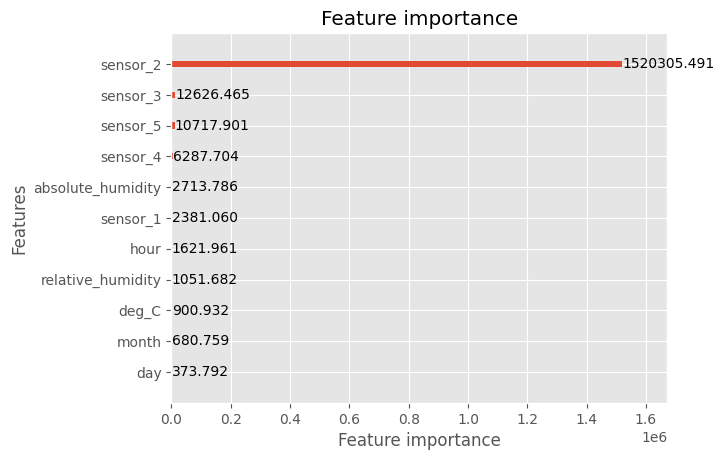

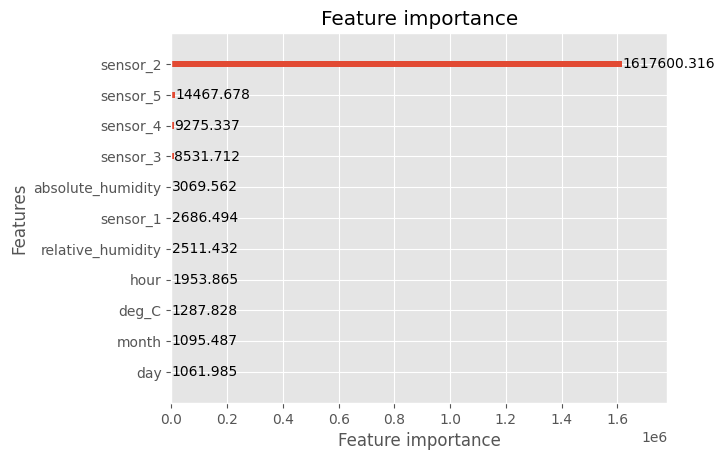

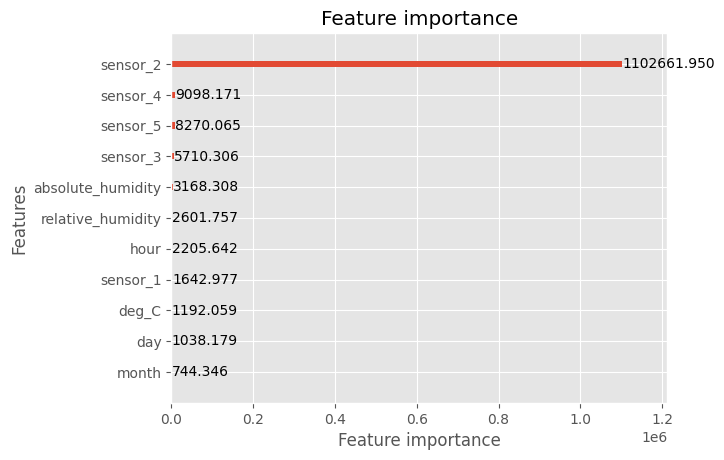

In [122]:
#各変数の重要度を確認する
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)
plt.show()
#max_num_featuresで表示する数を15個制限

In [123]:
#説明変数をsensor_2で再予測
train_X = train_df_le[["sensor_2"]] #説明変数
train_Y = train_df_le["target_benzene"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 7.41193
[20]	valid_0's l2: 2.3411
[30]	valid_0's l2: 1.78314
[40]	valid_0's l2: 1.73719
[50]	valid_0's l2: 1.7403
[60]	valid_0's l2: 1.74538
Early stopping, best iteration is:
[42]	valid_0's l2: 1.73667
y_valid 0       12.0
1        9.9
2        9.2
3        9.7
4        6.4
        ... 
2366    25.8
2367    23.2
2368    10.0
2369     8.6
2370     9.8
Name: target_benzene, Length: 2371, dtype: float64
y_pred [13.06511479  7.99248481  8.93293545 ...  8.62985763  9.52846614
 10.87879378]
0.17751798675584868
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 6.2688
[20]	valid_0's l2: 1.95651
[30]	valid_0's l2: 1.5045
[40]	valid_0's l2: 1.47876
[50]	valid_0's l2: 1.48813
Early stopping, best iteration is:
[38]	valid_0's l2: 1.47826
y_valid 2371     9.4
2372    10.2
2373     9.2
2374     9.3
2375    14.9
        ... 
4736     4.3
4737     1.9
4738     2.6
4739     2.8
4740     8.4
Na

In [124]:
#説明変数をsensor_2のみのほうが精度がよいのでそっちを採用
#テストデータの予測
#テストデータの用意
test_X = test_df_le[["sensor_2"]]

#クロスバリエーションごとに各モデルで予測値を算出
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

#predsの平均を計算してpreds_meanとして取得
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

#予測値をtarget_benzeneの値として置き換え
submission["target_benzene"] = preds_mean

In [125]:
############################################################
#target_nitrogen_oxidesの予測
############################################################

In [126]:
all_df_le = all_df.drop(["target_carbon_monoxide", "target_benzene"], axis=1)

In [127]:
#再び学習データとテストデータに分割する
train_df_le = all_df_le[~(all_df_le["target_nitrogen_oxides"].isnull())]
test_df_le = all_df_le[all_df_le["target_nitrogen_oxides"].isnull()]

In [128]:
#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_nitrogen_oxides"], axis = 1) #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 4579.92
[20]	valid_0's l2: 6219.87
[30]	valid_0's l2: 7311.5
Early stopping, best iteration is:
[11]	valid_0's l2: 4316.96
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [261.3715764  152.01648942 159.52434578 ... 136.70134589 151.26398593
 171.38512132]
0.6394593806466256
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 9251.95
[20]	valid_0's l2: 6500.72
[30]	valid_0's l2: 5723.3
[40]	valid_0's l2: 5285.95
[50]	valid_0's l2: 5172.59
[60]	valid_0's l2: 5147.6
[70]	valid_0's l2: 5062.71
[80]	valid_0's l2: 5004.57
[90]	valid_0's l2: 5051.6
Early stopping, best iteration is:
[78]	valid_0's l2: 4999.4
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74

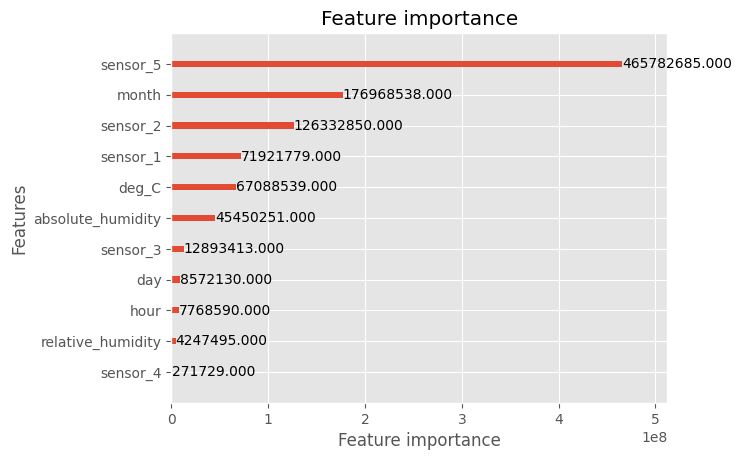

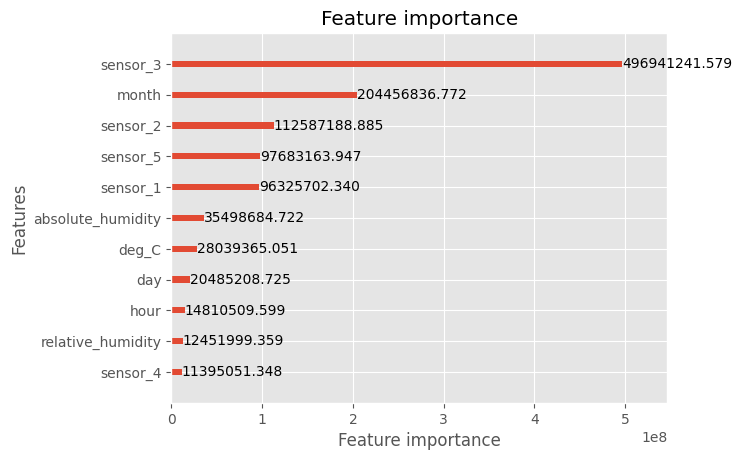

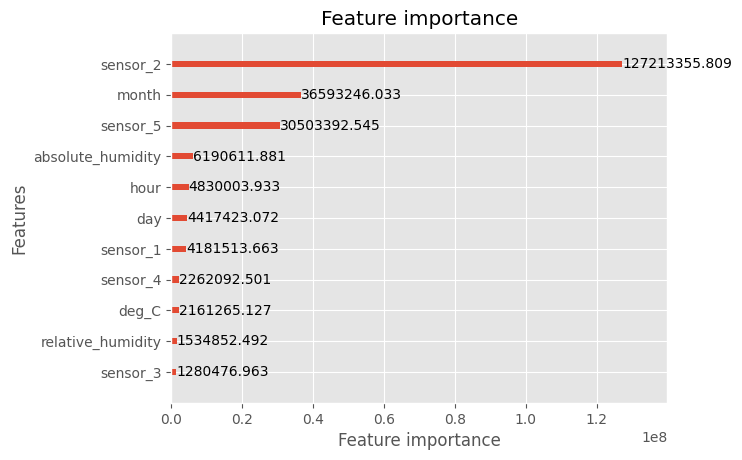

In [129]:
#各変数の重要度を確認する
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)
plt.show()
#max_num_featuresで表示する数を15個制限

In [130]:
#説明変数をsensor_5のみ
train_X = train_df_le[["sensor_5"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 12569.9
[20]	valid_0's l2: 14098.7
Early stopping, best iteration is:
[9]	valid_0's l2: 12522.6
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [293.67029475 224.10751423 236.3855195  ... 224.10751423 205.11927566
 205.11927566]
0.876538268502841
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 11421.7
[20]	valid_0's l2: 10268.6
[30]	valid_0's l2: 10255.3
[40]	valid_0's l2: 10331
Early stopping, best iteration is:
[23]	valid_0's l2: 10233.7
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
4740    241.3
Name: target_nitrogen_oxides, Length: 2370, dtype: float64
y_pred [161.07029863 131.8696908  161.18760

In [131]:
#説明変数をsensor_5とmonthのみ
train_X = train_df_le[["sensor_5", "month"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3470.79
[20]	valid_0's l2: 1735.57
[30]	valid_0's l2: 1560.59
[40]	valid_0's l2: 1565.72
[50]	valid_0's l2: 1583.66
Early stopping, best iteration is:
[34]	valid_0's l2: 1554.63
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [187.71826756 122.55780551 145.52219489 ... 122.55780551 118.63798528
 118.63798528]
0.38545136203230707
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 7729.07
[20]	valid_0's l2: 5739.77
[30]	valid_0's l2: 5463.13
[40]	valid_0's l2: 5480.82
[50]	valid_0's l2: 5655.62
Early stopping, best iteration is:
[30]	valid_0's l2: 5463.13
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
474

In [132]:
#説明変数をsensor_3とmonthのみ
train_X = train_df_le[["sensor_3", "month"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3301
[20]	valid_0's l2: 2737.44
[30]	valid_0's l2: 3087.44
Early stopping, best iteration is:
[16]	valid_0's l2: 2626.08
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [ 80.83365398  80.83365398  80.83365398 ... 121.35516509 121.35516509
 121.35516509]
0.518490530232258
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 11339.6
[20]	valid_0's l2: 11343.5
[30]	valid_0's l2: 12538.6
Early stopping, best iteration is:
[14]	valid_0's l2: 11052.3
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
4740    241.3
Name: target_nitrogen_oxides, Length: 2370, dtype: float64
y_pred [164.91025669 153.49296742 164.91025

In [133]:
#説明変数をsensor_2とmonthのみ
train_X = train_df_le[["sensor_2", "month"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3113.09
[20]	valid_0's l2: 1457.19
[30]	valid_0's l2: 1417.53
[40]	valid_0's l2: 1447.19
Early stopping, best iteration is:
[25]	valid_0's l2: 1399.36
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [157.46944588  95.13931319 106.99521392 ... 104.60708883 116.73611181
 134.16467842]
0.36593605515837146
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 8075.05
[20]	valid_0's l2: 6053.1
[30]	valid_0's l2: 6108.88
[40]	valid_0's l2: 6260.1
Early stopping, best iteration is:
[23]	valid_0's l2: 5965.05
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
4740    241.3
Name: target_nitrogen_oxides, Length: 2370, d

In [134]:
#説明変数をsensor_2とsensor_3とsensor_5とmonthのみ
train_X = train_df_le[["sensor_2", "sensor_3", "sensor_5", "month"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3143.83
[20]	valid_0's l2: 1321.98
[30]	valid_0's l2: 1217.07
[40]	valid_0's l2: 1297.11
Early stopping, best iteration is:
[27]	valid_0's l2: 1204.46
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [176.5115128  100.8230565  110.02647238 ... 102.83261294 118.85762397
 137.4582976 ]
0.3504465810088898
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 8884.26
[20]	valid_0's l2: 6673.22
[30]	valid_0's l2: 6217.74
[40]	valid_0's l2: 6105.25
[50]	valid_0's l2: 6492.23
Early stopping, best iteration is:
[39]	valid_0's l2: 6086.12
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
4740    241.3
Name: target_nitr

In [135]:
#どの場合でも精度が悪いので先ほど作ったモデルを使って予測した"target_carbon_monoxide", "target_benzene"の値も利用する

In [136]:
#target_carbon_monoxideの予測
all_df_le = all_df.drop(["target_nitrogen_oxides", "target_benzene"], axis=1)
train_df_le = all_df_le[~(all_df_le["target_carbon_monoxide"].isnull())]
test_df_le = all_df_le[all_df_le["target_carbon_monoxide"].isnull()]

#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_carbon_monoxide"], axis = 1) #説明変数
train_Y = train_df_le["target_carbon_monoxide"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.35128
[20]	valid_0's l2: 0.168284
[30]	valid_0's l2: 0.141752
[40]	valid_0's l2: 0.142023
[50]	valid_0's l2: 0.14397
Early stopping, best iteration is:
[32]	valid_0's l2: 0.140111
y_valid 0       2.5
1       2.1
2       2.2
3       2.2
4       1.5
       ... 
2366    4.6
2367    3.9
2368    1.8
2369    1.7
2370    1.8
Name: target_carbon_monoxide, Length: 2371, dtype: float64
y_pred [3.0625956  2.18167067 2.16959322 ... 1.69434023 1.8025937  1.74852456]
0.25011139519291425
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.398561
[20]	valid_0's l2: 0.241025
[30]	valid_0's l2: 0.213789
[40]	valid_0's l2: 0.199729
[50]	valid_0's l2: 0.202298
[60]	valid_0's l2: 0.201484
Early stopping, best iteration is:
[41]	valid_0's l2: 0.199152
y_valid 2371    1.7
2372    1.6
2373    1.9
2374    1.6
2375    2.6
       ... 
4736    0.7
4737    0.4
4738    0.4
4739    0.5
4740    1.2
Name: ta

In [137]:
#テストデータの用意
test_X = all_df_le.drop(["target_carbon_monoxide"], axis = 1)

#クロスバリエーションごとに各モデルで予測値を算出
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

#predsの平均を計算してpreds_meanとして取得
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

#予測値をtarget_carbon_monoxideの値として保存
target_carbon_monoxide = preds_mean

In [138]:
all_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,year,month,day,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,2010,3,10,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,2010,3,10,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,2010,3,10,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,2010,3,10,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,2010,3,10,22


In [139]:
#target_benzeneの予測
all_df_le = all_df.drop(["target_nitrogen_oxides", "target_carbon_monoxide"], axis=1)
train_df_le = all_df_le[~(all_df_le["target_benzene"].isnull())]
test_df_le = all_df_le[all_df_le["target_benzene"].isnull()]

#説明変数と目的変数の作成
train_X = train_df_le[["sensor_2"]] #説明変数
train_Y = train_df_le["target_benzene"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 7.41193
[20]	valid_0's l2: 2.3411
[30]	valid_0's l2: 1.78314
[40]	valid_0's l2: 1.73719
[50]	valid_0's l2: 1.7403
[60]	valid_0's l2: 1.74538
Early stopping, best iteration is:
[42]	valid_0's l2: 1.73667
y_valid 0       12.0
1        9.9
2        9.2
3        9.7
4        6.4
        ... 
2366    25.8
2367    23.2
2368    10.0
2369     8.6
2370     9.8
Name: target_benzene, Length: 2371, dtype: float64
y_pred [13.06511479  7.99248481  8.93293545 ...  8.62985763  9.52846614
 10.87879378]
0.17751798675584868
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 6.2688
[20]	valid_0's l2: 1.95651
[30]	valid_0's l2: 1.5045
[40]	valid_0's l2: 1.47876
[50]	valid_0's l2: 1.48813
Early stopping, best iteration is:
[38]	valid_0's l2: 1.47826
y_valid 2371     9.4
2372    10.2
2373     9.2
2374     9.3
2375    14.9
        ... 
4736     4.3
4737     1.9
4738     2.6
4739     2.8
4740     8.4
Na

In [140]:
#テストデータの用意
test_X = all_df_le[["sensor_2"]]

#クロスバリエーションごとに各モデルで予測値を算出
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

#predsの平均を計算してpreds_meanとして取得
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

#予測値をtarget_benzeneの値として置き換え
all_df_le["target_benzene"] = preds_mean

In [141]:
all_df_le["target_carbon_monoxide"] = target_carbon_monoxide

In [142]:
all_df_le.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_benzene,year,month,day,hour,target_carbon_monoxide
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,13.036513,2010,3,10,18,3.005963
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,8.033146,2010,3,10,19,2.136241
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,8.895074,2010,3,10,20,2.174128
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,8.895074,2010,3,10,21,2.078319
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,6.901296,2010,3,10,22,1.691475


In [143]:
#target_carbon_monoxideの予測
all_df_le["target_nitrogen_oxides"] = all_df["target_nitrogen_oxides"]
train_df_le = all_df_le[~(all_df_le["target_nitrogen_oxides"].isnull())]
test_df_le = all_df_le[all_df_le["target_nitrogen_oxides"].isnull()]

#説明変数と目的変数の作成
train_X = train_df_le.drop(["target_nitrogen_oxides"], axis = 1) #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3215.21
[20]	valid_0's l2: 1669.1
[30]	valid_0's l2: 1804.59
Early stopping, best iteration is:
[19]	valid_0's l2: 1665.58
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [195.0033215  158.67558272 167.19663494 ... 130.47024723 129.17657069
 133.04728977]
0.4302827690312888
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 8347.44
[20]	valid_0's l2: 5438.86
[30]	valid_0's l2: 4780.44
[40]	valid_0's l2: 4570.38
[50]	valid_0's l2: 4549.7
[60]	valid_0's l2: 4477.83
[70]	valid_0's l2: 4514.21
[80]	valid_0's l2: 4521.32
Early stopping, best iteration is:
[62]	valid_0's l2: 4457.67
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738   

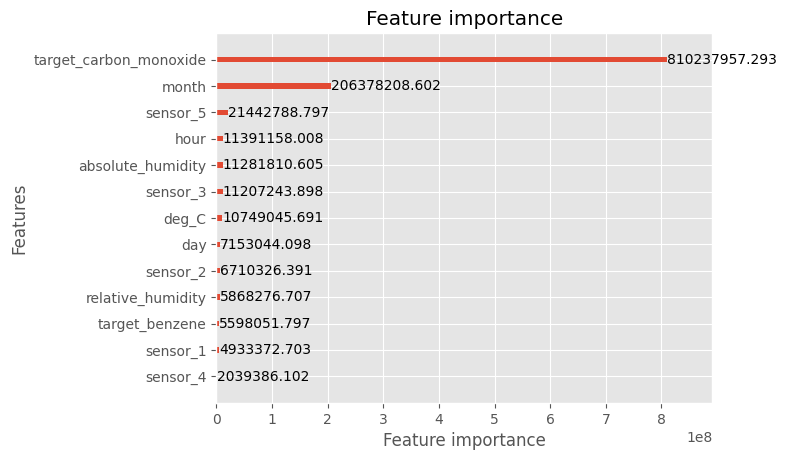

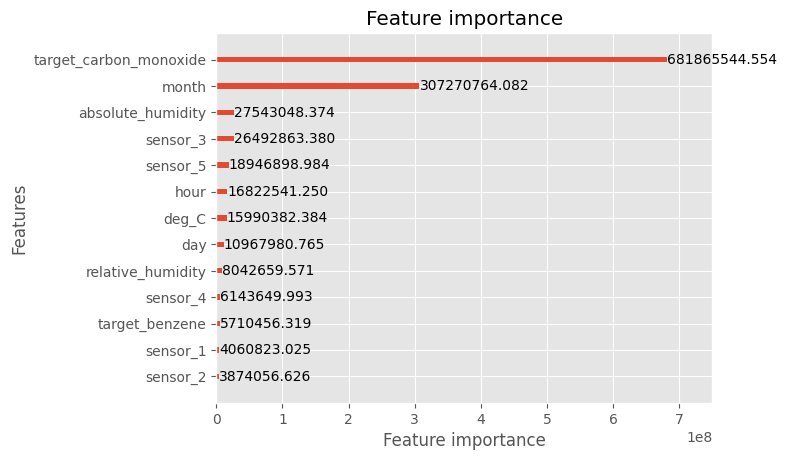

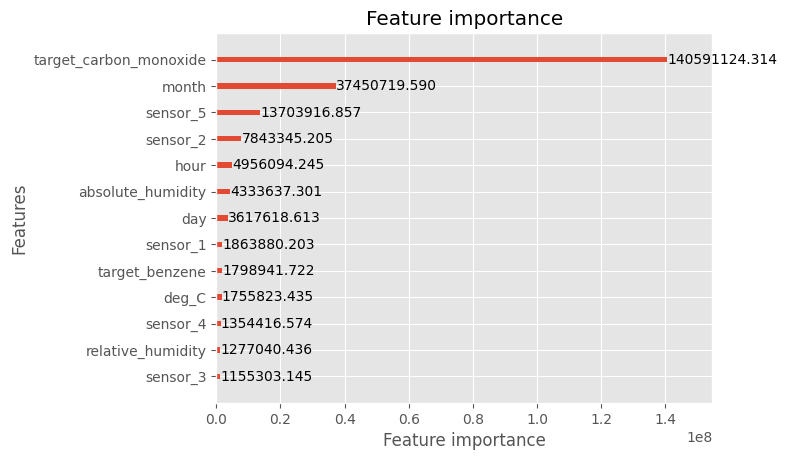

In [144]:
#各変数の重要度を確認する
for model in models:
    lgb.plot_importance(model, importance_type = "gain", max_num_features = 15)
plt.show()
#max_num_featuresで表示する数を15個制限

In [145]:
#説明変数をtarget_carbon_monoxideのみ

#説明変数と目的変数の作成
train_X = train_df_le[["target_carbon_monoxide"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 14237.2
[20]	valid_0's l2: 17954.5
Early stopping, best iteration is:
[6]	valid_0's l2: 13407
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [285.13469724 239.86292395 239.86292395 ... 211.30588805 211.30588805
 211.30588805]
0.9202531080712812
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 8867.18
[20]	valid_0's l2: 7136.39
[30]	valid_0's l2: 6934.94
[40]	valid_0's l2: 6933.91
[50]	valid_0's l2: 6960.83
Early stopping, best iteration is:
[33]	valid_0's l2: 6923.75
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736     74.4
4737     51.4
4738     62.7
4739    103.6
4740    241.3
Name: target_nitrogen_oxides, Length: 2370, dtype: float64
y_pred [168.769

In [146]:
#説明変数をtarget_carbon_monoxideとmonthのみ

#説明変数と目的変数の作成
train_X = train_df_le[["target_carbon_monoxide", "month"]] #説明変数
train_Y = train_df_le["target_nitrogen_oxides"] #目的変数

import numpy as np
models = [] #作成したモデルを順にmodelsに格納
rmses = [] #rmseの計算結果を格納
oof = np.zeros(len(train_X)) #目的変数を予測した値を格納

#3分割と定義したkfによってtrain_Xを分割
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index] #学習データの説明変数
    X_valid = train_X.iloc[val_index] #検証データの説明変数
    y_train = train_Y.iloc[train_index] #学習データの目的変数
    y_valid = train_Y.iloc[val_index] #学習データの目的変数

    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train, free_raw_data=False)
    #reference: 検証データ（lgb_eval）に学習データ（lgb_train）を参照させることで、LightGBMが効率的に学習できます。

    model_lgb = lgb.train(
       lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,  # 検証データを指定
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True), # early_stopping用コールバック関数
                 lgb.log_evaluation(period=10)] # コマンドライン出力用コールバック関数
    )

    y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) #num_iteration=model_lgb.best_iteration: 最適なイテレーション数で予測
    print("y_valid", y_valid)
    print("y_pred", y_pred)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

#平均RMSEを計算
reses_mean = sum(rmses)/len(rmses)
print("rmses: ",reses_mean)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3094.08
[20]	valid_0's l2: 1240.45
[30]	valid_0's l2: 1077.83
[40]	valid_0's l2: 1086.86
[50]	valid_0's l2: 1077.58
Early stopping, best iteration is:
[31]	valid_0's l2: 1070.36
y_valid 0       167.7
1        98.9
2       127.1
3       177.2
4       121.8
        ...  
2366    279.0
2367    295.0
2368    162.2
2369    156.6
2370    132.1
Name: target_nitrogen_oxides, Length: 2371, dtype: float64
y_pred [204.24015118 134.79797589 143.86848538 ... 109.3431523  108.54710975
 107.00581066]
0.27530647374470896
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 7980.83
[20]	valid_0's l2: 5809.9
[30]	valid_0's l2: 5487.68
[40]	valid_0's l2: 5383.39
[50]	valid_0's l2: 5355.37
[60]	valid_0's l2: 5374.2
[70]	valid_0's l2: 5452.08
Early stopping, best iteration is:
[55]	valid_0's l2: 5340.3
y_valid 2371    109.7
2372    118.8
2373    118.8
2374    110.0
2375    176.0
        ...  
4736    

In [63]:
#説明変数がtarget_carbon_monoxideとmonthのみの時の結果が一番良いのでそれを採用する

In [147]:
test_df

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [148]:
test_df_le

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_benzene,year,month,day,hour,target_carbon_monoxide,target_nitrogen_oxides
7111,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,4.868764,2011,1,1,0,1.459836,NaN
7112,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,7.155403,2011,1,1,1,1.825593,NaN
7113,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,7.604923,2011,1,1,2,1.724004,NaN
7114,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,8.633882,2011,1,1,3,1.850594,NaN
7115,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,6.983545,2011,1,1,4,1.302656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,11.371761,2011,4,4,10,2.558691,NaN
9354,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,9.433507,2011,4,4,11,2.193597,NaN
9355,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,12.461328,2011,4,4,12,2.352694,NaN
9356,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,10.808256,2011,4,4,13,2.028939,NaN


In [149]:
submission

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.459836,4.868764,300.0
1,2011-01-01 01:00:00,1.825593,7.155403,300.0
2,2011-01-01 02:00:00,1.724004,7.604923,300.0
3,2011-01-01 03:00:00,1.850594,8.633882,300.0
4,2011-01-01 04:00:00,1.302656,6.983545,300.0
...,...,...,...,...
2242,2011-04-04 10:00:00,2.558691,11.371761,300.0
2243,2011-04-04 11:00:00,2.193597,9.433507,300.0
2244,2011-04-04 12:00:00,2.352694,12.461328,300.0
2245,2011-04-04 13:00:00,2.028939,10.808256,300.0


In [150]:
#テストデータの用意
test_X = test_df_le[["target_carbon_monoxide", "month"]]

#クロスバリエーションごとに各モデルで予測値を算出
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

#predsの平均を計算してpreds_meanとして取得
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

#予測値をtarget_nitrogen_oxidesの値として置き換え
submission["target_nitrogen_oxides"] = preds_mean

In [151]:
submission

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.459836,4.868764,95.079978
1,2011-01-01 01:00:00,1.825593,7.155403,111.938696
2,2011-01-01 02:00:00,1.724004,7.604923,108.620298
3,2011-01-01 03:00:00,1.850594,8.633882,113.953149
4,2011-01-01 04:00:00,1.302656,6.983545,86.072958
...,...,...,...,...
2242,2011-04-04 10:00:00,2.558691,11.371761,155.706836
2243,2011-04-04 11:00:00,2.193597,9.433507,138.675701
2244,2011-04-04 12:00:00,2.352694,12.461328,146.033244
2245,2011-04-04 13:00:00,2.028939,10.808256,129.088437


In [153]:
#csvファイルとして書き出す
submission.to_csv("/content/drive/MyDrive/kaggle/air_ppllution/submit/air_pollution_submit01.csv", index = False)